import all important libraries

In [125]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier

load data

In [126]:
df = pd.read_csv("wdbc.data", header=None)

add column names

In [127]:
df.columns = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
              'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
              'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
              'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
              'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
              'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
              'symmetry_worst', 'fractal_dimension_worst']

Data preparation

In [128]:


print("First 5 rows of the dataset:")
print(df.head())

# Summary statistics
print("\nSummary statistics of the dataset:")
print(df.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Check the distribution of the target variable
print("\nDistribution of the target variable:")
print(df['diagnosis'].value_counts())

# Convert diagnosis to numerical values (B=0, M=1)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Separate features and target variable
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']


First 5 rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_wor

split data into training and testing

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Data preprocessing pipeline

In [130]:
# Define numerical and categorical features (in this dataset, all features are numerical)
numerical_features = X.columns.tolist()
categorical_features = []  # No categorical features in this dataset

# Create preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())  # Scale numerical features
])

Combine preprocessing pipeline

In [131]:
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features)
], remainder='passthrough')  # All columns are numerical, so remainder is 'passthrough'



Apply preprocessing to training and testing

In [132]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

model selection and training

In [133]:
# Define a list of models to evaluate
models = {
    'GaussianNB': GaussianNB(),
    'SVM': SVC(probability=True, random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, solver='liblinear'),
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'NeuralNetwork': MLPClassifier(random_state=42, max_iter=300)
}

Define hyperparameter grids for each model

In [134]:
param_grids = {
    'GaussianNB': {},  # No hyperparameters to tune
    'SVM': {'C': [0.1, 1, 10], 'gamma': [0.001, 0.1, 1], 'kernel': ['rbf']},
    'LogisticRegression': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [4, 6, 8], 'min_samples_leaf': [1, 3, 5]},
    'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'NeuralNetwork': {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['relu', 'tanh'], 'solver': ['adam'], 'alpha': [0.0001, 0.001]}
}

In [135]:
# Train and evaluate each model using GridSearchCV and cross-validation
best_models = {}
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {name}: {grid_search.best_score_:.4f}")


Training and evaluating GaussianNB...
Best hyperparameters for GaussianNB: {}
Best cross-validation score for GaussianNB: 0.9321
Training and evaluating SVM...
Best hyperparameters for SVM: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation score for SVM: 0.9623
Training and evaluating LogisticRegression...
Best hyperparameters for LogisticRegression: {'C': 1, 'penalty': 'l2'}
Best cross-validation score for LogisticRegression: 0.9698
Training and evaluating RandomForest...
Best hyperparameters for RandomForest: {'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 100}
Best cross-validation score for RandomForest: 0.9446
Training and evaluating GradientBoosting...
Best hyperparameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best cross-validation score for GradientBoosting: 0.9421
Training and evaluating NeuralNetwork...
Best hyperparameters for NeuralNetwork: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50

Compare

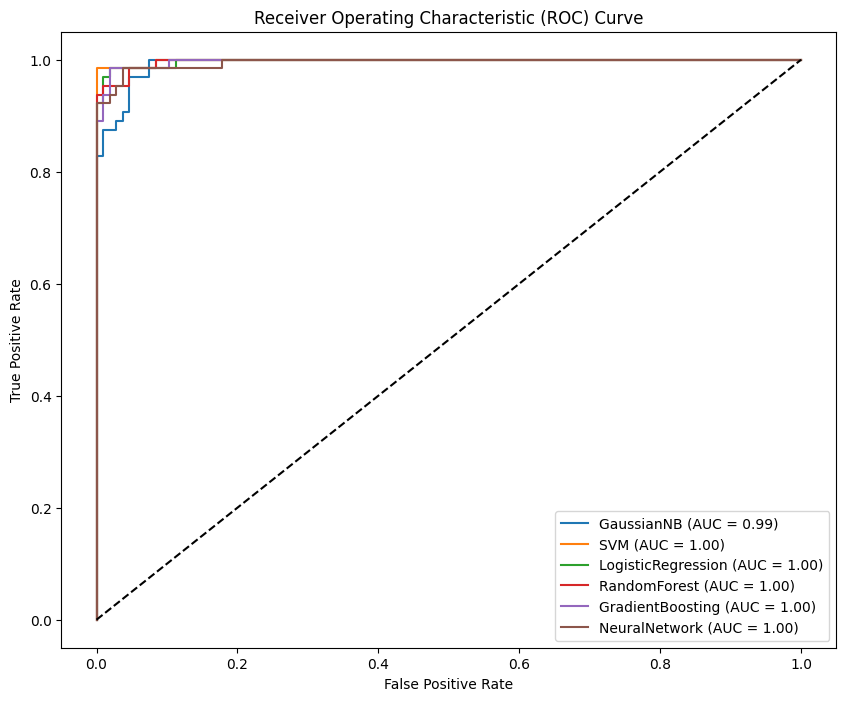

In [136]:
# Compare ROC curves and AUC values
plt.figure(figsize=(10, 8))
for name, model in best_models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Compare precision-recall curves

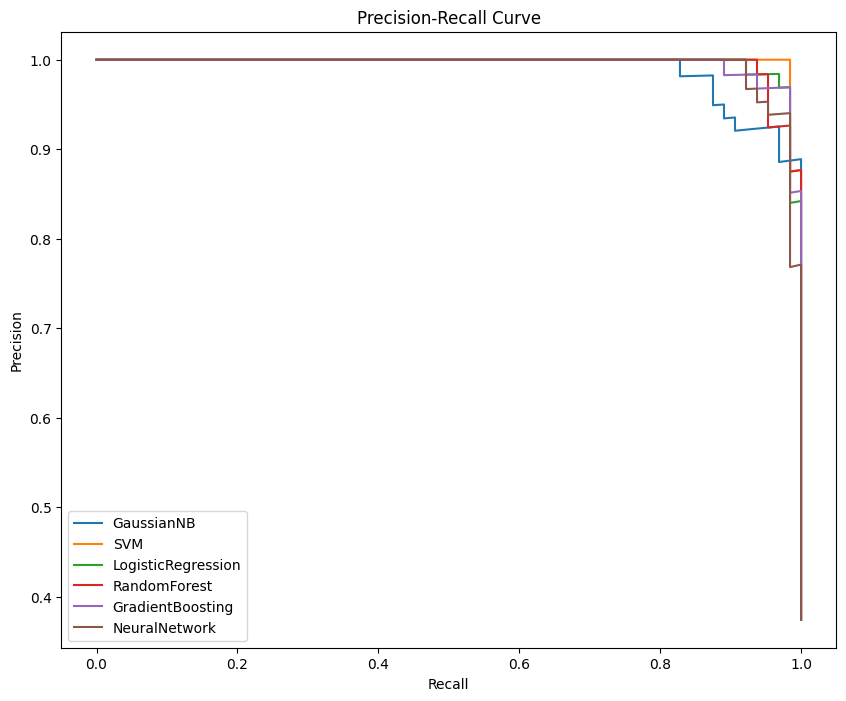

In [137]:
plt.figure(figsize=(10, 8))
for name, model in best_models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, label=f'{name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Deployment

In [138]:
best_model_name = max(best_models, key=lambda k: classification_report(y_test, best_models[k].predict(X_test), output_dict=True)['accuracy'])
best_model = best_models[best_model_name]

print(f"\nSelected Best Model: {best_model_name}")
print(f"Best Model: {best_model}")



Selected Best Model: LogisticRegression
Best Model: LogisticRegression(C=1, random_state=42, solver='liblinear')
